# Q3 Scorecard

In [1]:
from datetime import datetime
from scipy.stats import zscore
from string import ascii_letters
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, roc_curve, auc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import pickle
import missingno as msno
import scorecardpy as sc
%matplotlib inline
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)

In [2]:
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))
    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,6),"Recall:",round(recall,6),"Precision:",round(precision,6),
          "Sensitivity:",round(sensitivity,6),"Specificity:",round(specificity,6))

In [100]:
def cf_matrix(ypred, ytrue):
    from sklearn.metrics import confusion_matrix
    import pandas as pd
    import numpy as np
    c_matrix = confusion_matrix(ytrue, ypred)
    c_matrix_pct = c_matrix.astype('float') / c_matrix.sum(axis=1)[:, np.newaxis]
    # Turn to dataframe
    df_cm = pd.DataFrame(
            c_matrix_pct, index=['Others', 'Bad'], columns=['Others', 'Bad'], 
    )
    # Parameters of the image
    figsize = (5,4)
    fontsize=10
    # Create image
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')
    # Make it nicer
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, 
                                ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45,
                                ha='right', fontsize=fontsize)
    # Add labels
    plt.ylabel('True Loan Status')
    plt.xlabel('Predicted Loan Status')
    # Plot!
    plt.show()

In [56]:
train_woe_iv_cf = pickle.load(open('Q2_train_woe_iv_cf.pkl', 'rb'))
test_woe_iv_cf = pickle.load(open('Q2_test_woe_iv_cf.pkl', 'rb'))

In [57]:
X_train = train_woe_iv_cf.drop(columns="loan_status")
X_test = test_woe_iv_cf.drop(columns="loan_status")
y_train = train_woe_iv_cf["loan_status"]
y_test = test_woe_iv_cf["loan_status"]

### Q3.1.1 Logistic Model Initialization

In [78]:
pd_model = LogisticRegressionCV(
    penalty = 'elasticnet',
    Cs = np.arange(1, 25, 1),   # How many parameters to try. Can also be a vector with parameters to try.
    tol = 0.000001,             # Tolerance for parameters
    cv = 3,                     # How many CV folds to try. 3 or 5 should be enough.
    fit_intercept = True,       # Use constant?
    class_weight = 'balanced',  # Weights, see below
    random_state = 251316935,   # Random seed
    max_iter = 100,             # Maximum iterations
    verbose = 2,                # Show process. 1 is yes.
    solver = 'saga',            # How to optimize.
    n_jobs = -1,                # Processes to use. Set to number of physical cores. 
    refit = True,               # If to retrain with the best parameter and all data after finishing.
    l1_ratios = np.arange(0, 1.1, 0.1), # The LASSO / Ridge ratios.
)

### Q3.1.2 Model Fitting

In [7]:
pd_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 2, change: 0.47337841
Epoch 2, change: 0.48177729
Epoch 2, change: 0.48675938
Epoch 2, change: 0.47338403
Epoch 2, change: 0.49617974
Epoch 2, change: 0.47338122
Epoch 2, change: 0.49158558
Epoch 2, change: 0.47669424
Epoch 3, change: 0.47862554
Epoch 3, change: 0.49629312
Epoch 3, change: 0.50746500
Epoch 3, change: 0.47859579
Epoch 3, change: 0.47861066
Epoch 3, change: 0.51896831
Epoch 3, change: 0.48543220
Epoch 3, change: 0.53082941
Epoch 4, change: 0.24513381
Epoch 4, change: 0.24514259
Epoch 4, change: 0.26422993
Epoch 4, change: 0.25637994
Epoch 4, change: 0.24513820
Epoch 4, change: 0.27295886
Epoch 4, change: 0.28266207
Epoch 4, change: 0.24931747
Epoch 5, change: 0.20918097
Epoch 5, change: 0.20918109
Epoch 5, change: 0.24075528
Epoch 5, change: 0.2

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.1min finished


Epoch 1, change: 1.00000000
Epoch 2, change: 0.69076555
Epoch 3, change: 0.50916321
Epoch 4, change: 0.29480148
Epoch 5, change: 0.31529179
Epoch 6, change: 0.26760016
Epoch 7, change: 0.05431517
Epoch 8, change: 0.11394287
Epoch 9, change: 0.09910611
Epoch 10, change: 0.01537246
Epoch 11, change: 0.01395497
Epoch 12, change: 0.01356746
Epoch 13, change: 0.00356493
Epoch 14, change: 0.00152293
Epoch 15, change: 0.00136323
Epoch 16, change: 0.00055363
Epoch 17, change: 0.00046831
Epoch 18, change: 0.00019600
Epoch 19, change: 0.00022081
Epoch 20, change: 0.00017787
Epoch 21, change: 0.00004872
Epoch 22, change: 0.00005134
Epoch 23, change: 0.00002741
Epoch 24, change: 0.00001464
Epoch 25, change: 0.00000880
Epoch 26, change: 0.00000555
Epoch 27, change: 0.00000557
Epoch 28, change: 0.00000237
Epoch 29, change: 0.00000214
Epoch 30, change: 0.00000112
convergence after 31 epochs took 12 seconds


LogisticRegressionCV(Cs=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                     class_weight='balanced', cv=3,
                     l1_ratios=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                     n_jobs=-1, penalty='elasticnet', random_state=251316935,
                     solver='saga', tol=1e-06, verbose=2)

### Q3.1.3 Model Testing

In [42]:
y_pred_proba = pd_model.predict_proba(X_test)

### Q3.1.4 Confusion Matrix

tp: 35887 tn: 129631 fp: 72772 fn: 17833
Accuracy: 0.646244 Recall: 0.668038 Precision: 0.330272 Sensitivity: 0.668038 Specificity: 0.64046


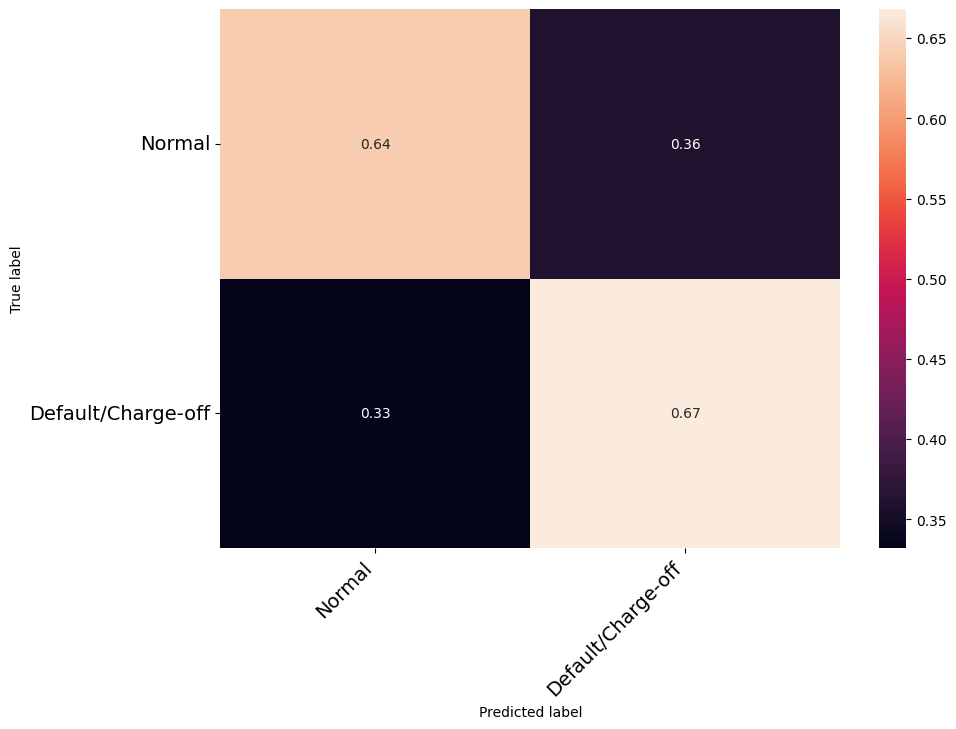

In [43]:
threshold = 0.5
ypred_new = pd_model.classes_[(y_pred_proba[:,1] > threshold).astype(int)]
compute_performance(ypred_new, y_test, pd_model.classes_)
cf_matrix(ypred_new, y_test)

### Q3.1.6 ROC AUC

AUC Model: 0.711


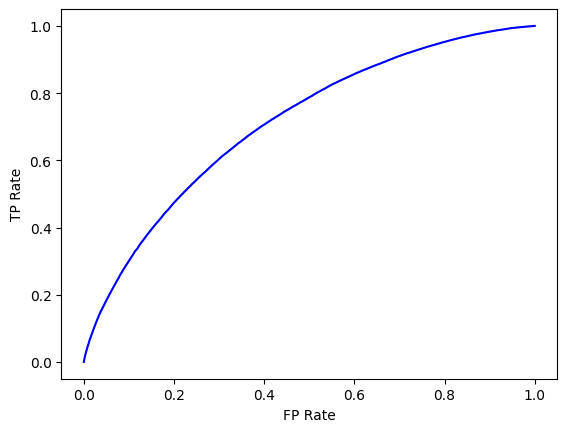

In [11]:
fpr1, tpr1, cut1_ = roc_curve(y_test, y_pred_proba[:,1], pos_label=1)
ax = sns.lineplot(x=fpr1, y=tpr1, color="blue")
ax.set_xlabel("FP Rate")
ax.set_ylabel("TP Rate")
print(f"AUC Model: {auc(fpr1, tpr1).round(3)}")

# Q3.1.7 Coefficients Checking

In [73]:
coef_df = pd.DataFrame({"Variable:": X_train.columns, "Coefficient": pd_model.coef_.flatten()})
coef_df.sort_values(by="Coefficient", ascending=False)

,Variable:,Coefficient
6,term_woe,0.962852
3,log_annul_inc_over_inst2_woe,0.817635
4,acc_open_past_24mths_woe,0.805464
0,unsecure_flag_woe,0.781196
16,application_type_woe,0.752246
18,home_ownership_woe,0.692939
19,purpose_woe,0.570474
1,fico_range_high_woe,0.557131
14,mths_since_recent_inq_woe,0.553047
13,dti_woe,0.546812


`log_loan_to_credit_limit_woe` is close to zero and could be not significant to the model potentially.

### Q3.1.8 Intercept Checking

In [77]:
pd_model.intercept_

array([-0.00235617])

The intercept is very close to zero, no issue found.

### Q3.1.9 Model Refit

In [79]:
X_train_refit = X_train.drop(columns="log_loan_to_credit_limit_woe")
X_test_refit = X_test.drop(columns="log_loan_to_credit_limit_woe")

In [80]:
pd_model.fit(X_train_refit, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 1, change: 1.00000000
Epoch 2, change: 0.45369674
Epoch 2, change: 0.45369213
Epoch 2, change: 0.45439138
Epoch 2, change: 0.45369444
Epoch 2, change: 0.46017112
Epoch 2, change: 0.46256021
Epoch 2, change: 0.45742197
Epoch 2, change: 0.46448089
Epoch 3, change: 0.40735346
Epoch 3, change: 0.40735633
Epoch 3, change: 0.40985831
Epoch 3, change: 0.40735489
Epoch 3, change: 0.43310352
Epoch 3, change: 0.44478534
Epoch 3, change: 0.45635971
Epoch 3, change: 0.42143099
Epoch 4, change: 0.24834996
Epoch 4, change: 0.24833838
Epoch 4, change: 0.25013120
Epoch 4, change: 0.24834417
Epoch 4, change: 0.26867395
Epoch 4, change: 0.27970347
Epoch 4, change: 0.25886525
Epoch 4, change: 0.29211503
Epoch 5, change: 0.22696362
Epoch 5, change: 0.22696345
Epoch 5, change: 0.22968772
Epoch 5, change: 0.2

[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:  3.9min finished


Epoch 1, change: 1.00000000
Epoch 2, change: 0.71221388
Epoch 3, change: 0.56778270
Epoch 4, change: 0.34481789
Epoch 5, change: 0.33495799
Epoch 6, change: 0.30628461
Epoch 7, change: 0.06157347
Epoch 8, change: 0.14466769
Epoch 9, change: 0.12732878
Epoch 10, change: 0.02417647
Epoch 11, change: 0.02122124
Epoch 12, change: 0.02280083
Epoch 13, change: 0.00551861
Epoch 14, change: 0.00241535
Epoch 15, change: 0.00230582
Epoch 16, change: 0.00093702
Epoch 17, change: 0.00066437
Epoch 18, change: 0.00033994
Epoch 19, change: 0.00047705
Epoch 20, change: 0.00030412
Epoch 21, change: 0.00016915
Epoch 22, change: 0.00008622
Epoch 23, change: 0.00006516
Epoch 24, change: 0.00003208
Epoch 25, change: 0.00002410
Epoch 26, change: 0.00001262
Epoch 27, change: 0.00000940
Epoch 28, change: 0.00000531
Epoch 29, change: 0.00000298
Epoch 30, change: 0.00000295
Epoch 31, change: 0.00000195
Epoch 32, change: 0.00000113
convergence after 33 epochs took 14 seconds


LogisticRegressionCV(Cs=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                     class_weight='balanced', cv=3,
                     l1_ratios=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                     n_jobs=-1, penalty='elasticnet', random_state=251316935,
                     solver='saga', tol=1e-06, verbose=2)

### Checking the coefficients, intercepts, confusion matrix and ROC AUC to confirm

In [83]:
coef_df = pd.DataFrame({"Variable:": X_train_refit.columns, "Coefficient": pd_model.coef_.flatten()})
coef_df.sort_values(by="Coefficient", ascending=False)

,Variable:,Coefficient
5,term_woe,0.961162
3,log_annul_inc_over_inst2_woe,0.811825
4,acc_open_past_24mths_woe,0.805846
0,unsecure_flag_woe,0.781346
15,application_type_woe,0.752508
17,home_ownership_woe,0.690412
18,purpose_woe,0.570674
1,fico_range_high_woe,0.556938
13,mths_since_recent_inq_woe,0.552941
12,dti_woe,0.548369


In [84]:
pd_model.intercept_

array([-0.00236022])

In [85]:
y_pred_proba = pd_model.predict_proba(X_test_refit)

tp: 35880 tn: 129634 fp: 72769 fn: 17840
Accuracy: 0.646229 Recall: 0.667908 Precision: 0.330238 Sensitivity: 0.667908 Specificity: 0.640475


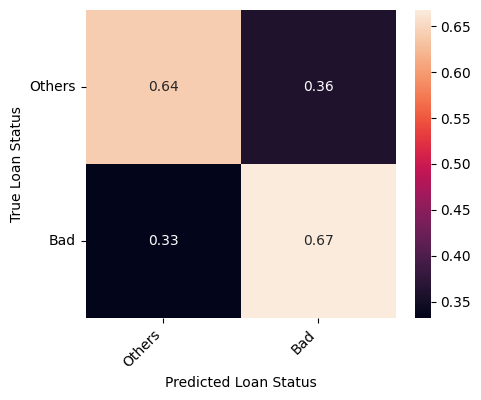

In [101]:
threshold = 0.5
ypred_new = pd_model.classes_[(y_pred_proba[:,1] > threshold).astype(int)]
compute_performance(ypred_new, y_test, pd_model.classes_)
cf_matrix(ypred_new, y_test)

AUC Model: 0.711


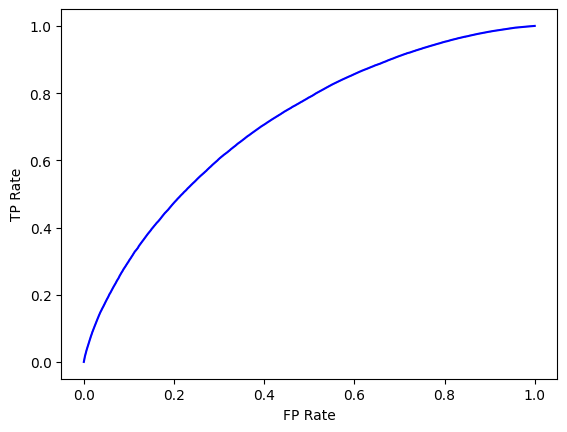

In [87]:
fpr1, tpr1, cut1_ = roc_curve(y_test, y_pred_proba[:,1], pos_label=1)
ax = sns.lineplot(x=fpr1, y=tpr1, color="blue")
ax.set_xlabel("FP Rate")
ax.set_ylabel("TP Rate")
print(f"AUC Model: {auc(fpr1, tpr1).round(3)}")

# Q3 Part 1 Completed

In [102]:
pickle.dump(X_train, open('Q3_X_train.pkl', 'wb'))
pickle.dump(X_test, open('Q3_X_test.pkl', 'wb'))
pickle.dump(y_train, open('Q3_y_train.pkl', 'wb'))
pickle.dump(y_test, open('Q3_y_test.pkl', 'wb'))
pickle.dump(pd_model, open('Q3_pd_model.pkl', 'wb'))
pickle.dump(y_pred_proba, open('Q3_y_pred_proba.pkl', 'wb'))
pickle.dump(X_train_refit, open('Q3_X_train_refit.pkl', 'wb'))
pickle.dump(X_test_refit, open('Q3_X_test_refit.pkl', 'wb'))

# Q3 Part 2: Scorecard Development

In [103]:
X_train_refit = pickle.load(open('Q3_X_train_refit.pkl', 'rb'))
pd_model = pickle.load(open('Q3_pd_model.pkl', 'rb'))
breaks = pickle.load(open('Q2_breaks.pkl','rb'))
train_no_woe = pickle.load(open('Q2_train.pkl','rb'))
test_no_woe = pickle.load(open('Q2_test.pkl','rb'))

In [104]:
bins_adj = sc.woebin(train_no_woe, y="loan_status", breaks_list=breaks)

[INFO] creating woe binning ...
Binning on 1024492 rows and 59 columns in 00:01:09


### Q3.2.1 Scorecard Development

In [105]:
application_scorecard = sc.scorecard(
    bins_adj,         # bins from the WoE
    pd_model,  # Trained logistic regression
    X_train_refit.columns, # The column names in the trained LR
    points0=750, # Base points
    odds0=0.01, # Base odds bads:goods
    pdo=50
) # PDO 

### Q3.2.2 Scorecard Simulation

In [106]:
train_score = sc.scorecard_ply(
    train_no_woe, 
    application_scorecard, 
    print_step=0)
test_score = sc.scorecard_ply(
    test_no_woe,
    application_scorecard, 
    print_step=0)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scorecardpy/scorecard.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_score.loc[:,'score'] = card_basepoints + dat_score.sum(axis=1)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scorecardpy/scorecard.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_score.loc[:,'score'] = card_basepoints + dat_score.sum(axis=1)


In [107]:
train_score.describe()

,score
count,1.024492e+06
mean,4.317286e+02
std,6.096367e+01
min,2.300000e+02
25%,3.890000e+02
50%,4.300000e+02
75%,4.720000e+02
max,7.070000e+02


In [108]:
test_score.describe()

,score
count,256123.000000
mean,431.633598
std,60.945821
min,238.000000
25%,389.000000
50%,430.000000
75%,472.000000
max,692.000000


In [118]:
train_score

,score
0,459.0
1,486.0
2,484.0
3,489.0
4,446.0
...,...
1280640,478.0
1280641,481.0
1280643,400.0
1280644,376.0


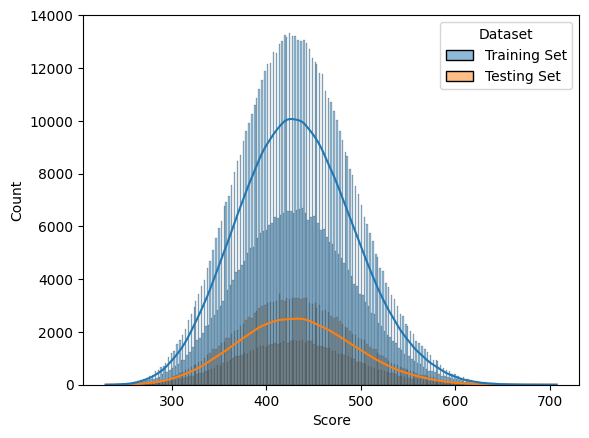

In [128]:
sns_df = pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'value': train_score.score, 'Dataset': 'Training Set'}),
    pd.DataFrame.from_dict({'value': test_score.score, 'Dataset': 'Testing Set'})
])
fig, ax = plt.subplots()
sns.histplot(
    data=sns_df, x='value', hue='Dataset', kde=True, ax=ax
)
ax.set_xlabel("Score")
ax.set_xlabel("Score")
plt.show()

# Q3 Complete

In [109]:
pickle.dump(application_scorecard, open('Q3_scorecard.pkl', 'wb'))